## Linear Regression on Boston Housing Dataset

We will take the Housing dataset which contains information about different houses in Boston. There are 506 samples and 13 feature variables in this dataset. 

The objective is to predict the value of prices of the house using the given features.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define column names
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
# load data, check pandas.read_csv usage: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
boston = pd.read_csv('housing.csv', delim_whitespace=True, names=names)

In [4]:
print("Boston housing dataset has {} data points with {} variables each.".format(*boston.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [5]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### The features can be summarized as follows:

CRIM: Per capita crime rate by town 城镇人均犯罪率<br />
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft 占地超过25,000平方英尺的住宅用地比例<br />
INDUS: Proportion of non-retail business acres per town 每个镇非零售业务用地比例<br />
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 查尔斯河虚拟变量（如果束缚河流，则为1；否则为0）<br />
NOX: Nitric oxide concentration (parts per 10 million) 一氧化氮浓度（百万分之一）<br />
RM: Average number of rooms per dwelling 每个住宅的平均房间数<br />
AGE: Proportion of owner-occupied units built prior to 1940 1940年之前建造的自有住房的比例<br />
DIS: Weighted distances to five Boston employment centers 到五个波士顿就业中心的加权距离<br />
RAD: Index of accessibility to radial highways 径向公路通达性指数<br />
TAX: Full-value property tax rate per 10,000 dollars 每10,000美元的全值财产税率<br />
PTRATIO: Pupil-teacher ratio by town 各镇师生比例<br />
B: the proportion of people of African American descent by town 按城镇划分的非裔美国人的比例<br />
LSTAT: Percentage of lower status of the population 人口中处于较低地位的百分比<br />
MEDV: Median value of owner-occupied homes in $1000s 自有住房的中位数价值（以1000美元计）<br />

The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

In [6]:
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Data preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [7]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

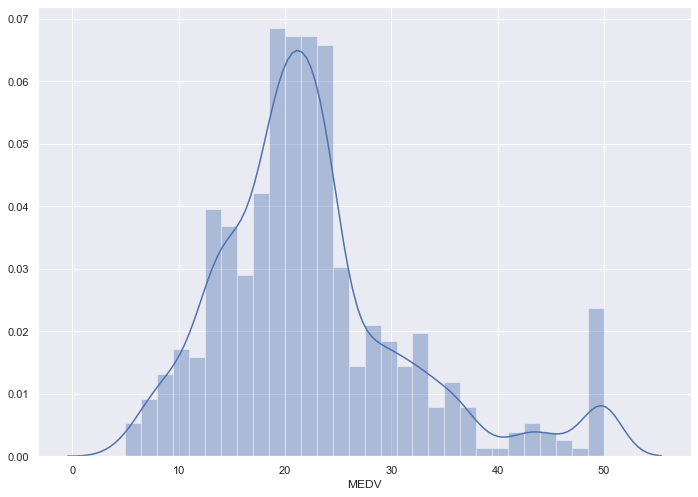

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

We see that the values of MEDV are distributed normally with few outliers. You can also use the histogram plot function from the matplotlib library.

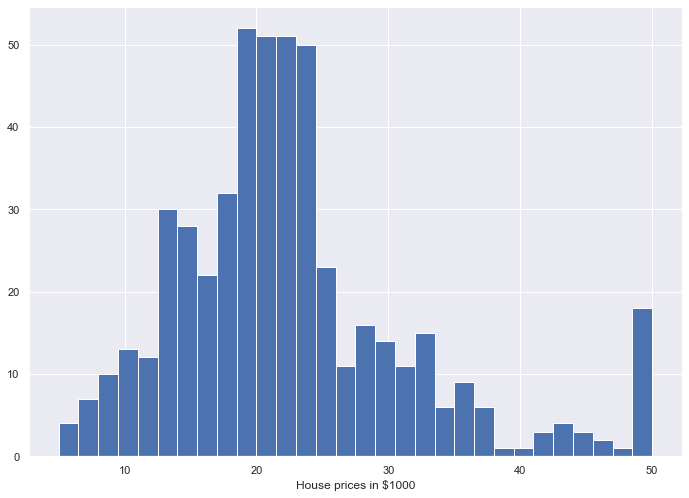

In [9]:
plt.hist(boston['MEDV'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

Let's see how these features plus MEDV distributions looks like

In [10]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


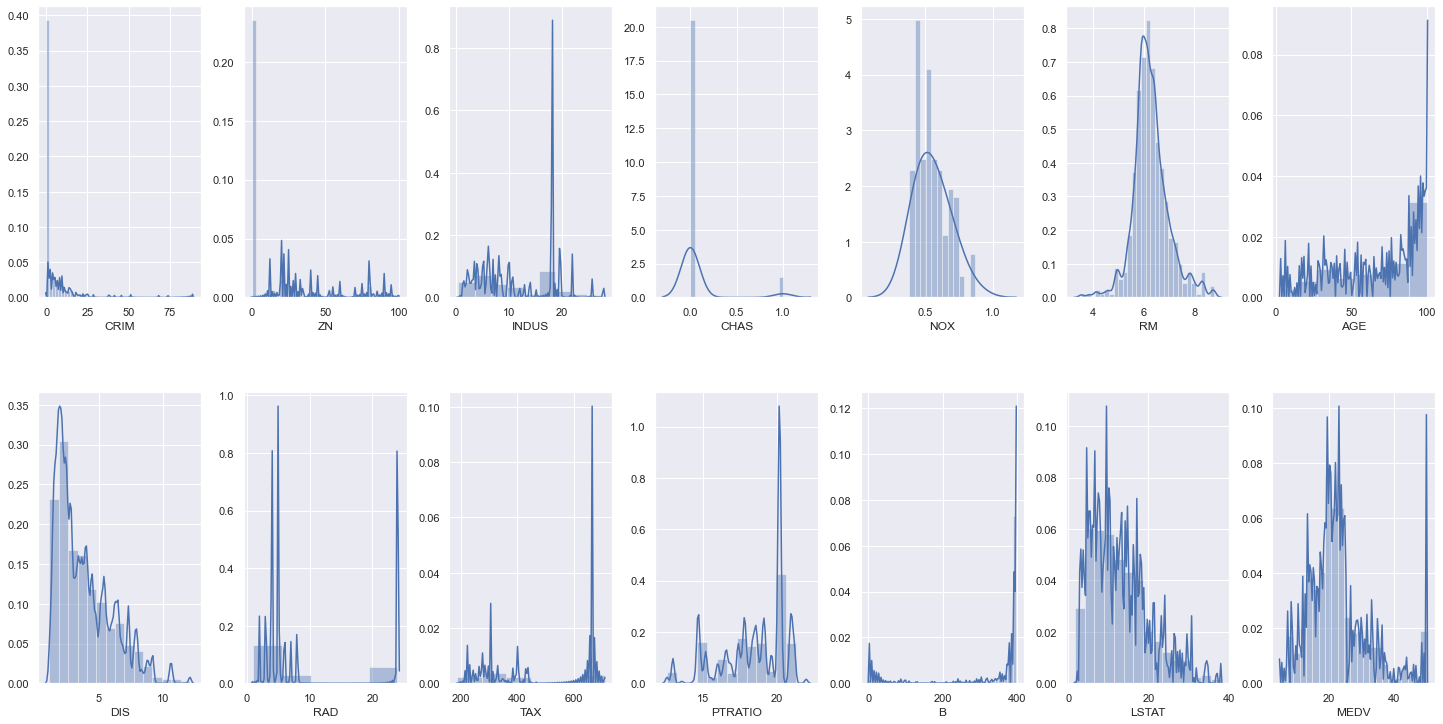

In [11]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.distplot(v, ax=axs[index], kde_kws={'bw':0.1})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

In [12]:
correlation_matrix = boston.corr().round(2)
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


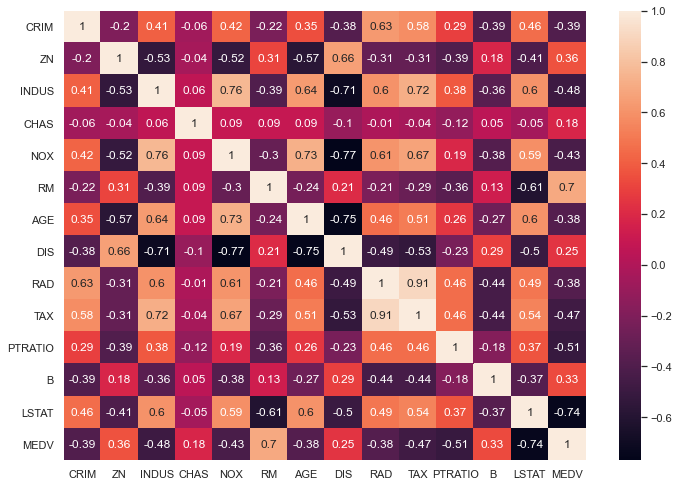

In [13]:
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Observations:

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

### TODO: Building a linear regression model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
# Select features that 
# 1.has correlationship with target of abs>0.35;  (delete "CHAS","DIS","B")
# 2.and multi-co-linearity with another feature of abs<0.7
features = ['CRIM', 'ZN', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
boston = boston.loc[:,features]
boston.shape

(506, 8)

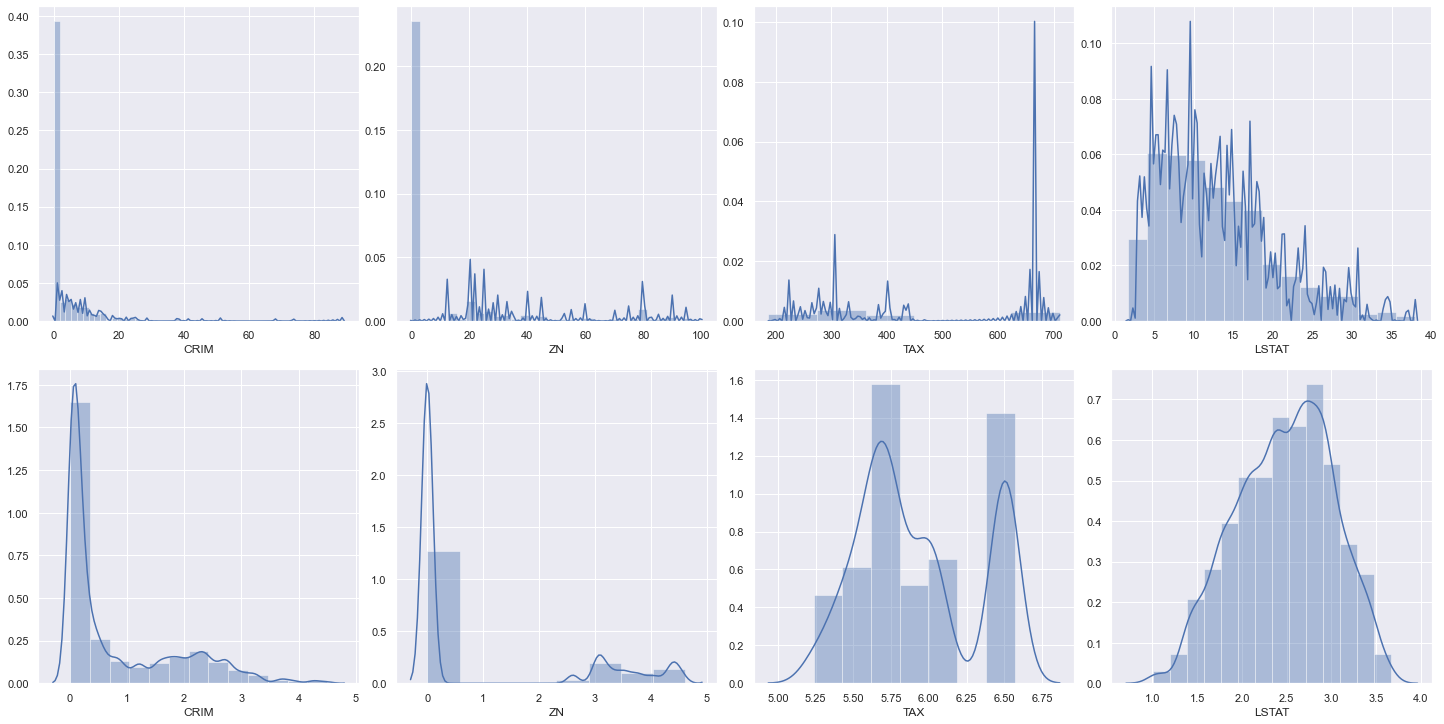

In [16]:
# Log-transformation
# "CRIM" "LSTAT" : Skewed distribution
# "ZN" "TAX" : Neither normal nor skewed???

# ref.https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html  
# ref.https://numpy.org/doc/stable/reference/generated/numpy.log1p.html

skewed_features = ['CRIM', 'ZN', 'TAX', 'LSTAT']

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

# plot distributions before log-transformation
for f in skewed_features:
    sns.distplot(boston[f], ax=axs[index], kde_kws={'bw':0.1})
    index += 1
    boston[f] = np.log1p(boston[f])  # log-transformation
    
# plot distributions after log-transformation
for f in skewed_features:
    sns.distplot(boston[f], ax=axs[index], kde_kws={'bw':0.1})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [17]:
# ??? "CRIM" and "ZN" a 2nd log-transformation
boston['CRIM'] = np.log1p(boston['CRIM'])
boston['ZN'] = np.log1p(boston['ZN'])

In [18]:
# Train-test split
X = boston.iloc[:,:-1]
y = boston.iloc[:,-1]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2345)

In [19]:
# Z-Score standardisation
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [20]:
# Create linear regression model
# ref. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
reg = LinearRegression().fit(train_ss_x, train_y)
print("Coefficient of determination R^2: ",reg.score(train_ss_x, train_y))
print("Estimated coefficients: ", reg.coef_)
print("Independent term in the linear model :", reg.intercept_)

Coefficient of determination R^2:  0.7411537418322365
Estimated coefficients:  [ 1.52359808 -0.52270464 -0.36195846  2.33722291 -1.20383588 -1.89310438
 -5.7562799 ]
Independent term in the linear model : 22.625247524752467


[]

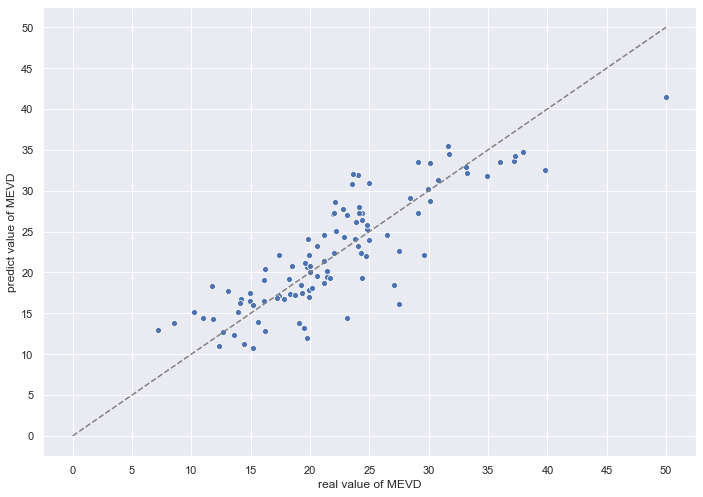

In [21]:
# Prediction
predict_y = reg.predict(test_ss_x)
plt.plot(figsize=(12,12))
sns.scatterplot(test_y, predict_y)
plt.xlabel("real value of MEVD")
plt.ylabel("predict value of MEVD")
plt.xticks([x for x in range(0,51)][::5])
plt.yticks([x for x in range(0,51)][::5])
plt.plot([0, 50], [0, 50], '--k', color="gray")
plt.plot()

# ref. https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html

In [22]:
# Evaluating Prediction results

print('MAE:', metrics.mean_absolute_error(test_y, predict_y))
print('MSE:', metrics.mean_squared_error(test_y, predict_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predict_y)))

# ref.https://www.kaggle.com/henriqueyamahata/boston-housing-with-linear-regression

MAE: 3.08925404895577
MSE: 15.267524693716108
RMSE: 3.9073680008051594


In [23]:
## ref. https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python